# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('previsao_de_renda.csv')


print(df.head())

   Unnamed: 0    data_ref  index sexo  posse_de_veiculo  posse_de_imovel  \
0           0  2015-01-01   8682    F             False             True   
1           1  2015-01-01  12830    M              True             True   
2           2  2015-01-01   2885    M              True             True   
3           3  2015-01-01  16168    F              True            False   
4           4  2015-01-01  12438    M             False            False   

   qtd_filhos   tipo_renda           educacao estado_civil tipo_residencia  \
0           1  Assalariado         Secundário       Casado            Casa   
1           0   Empresário         Secundário       Casado            Casa   
2           2  Assalariado  Superior completo       Casado            Casa   
3           0   Empresário         Secundário       Casado            Casa   
4           0  Assalariado         Secundário       Casado            Casa   

   idade  tempo_emprego  qt_pessoas_residencia    mau    renda  
0     36 

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


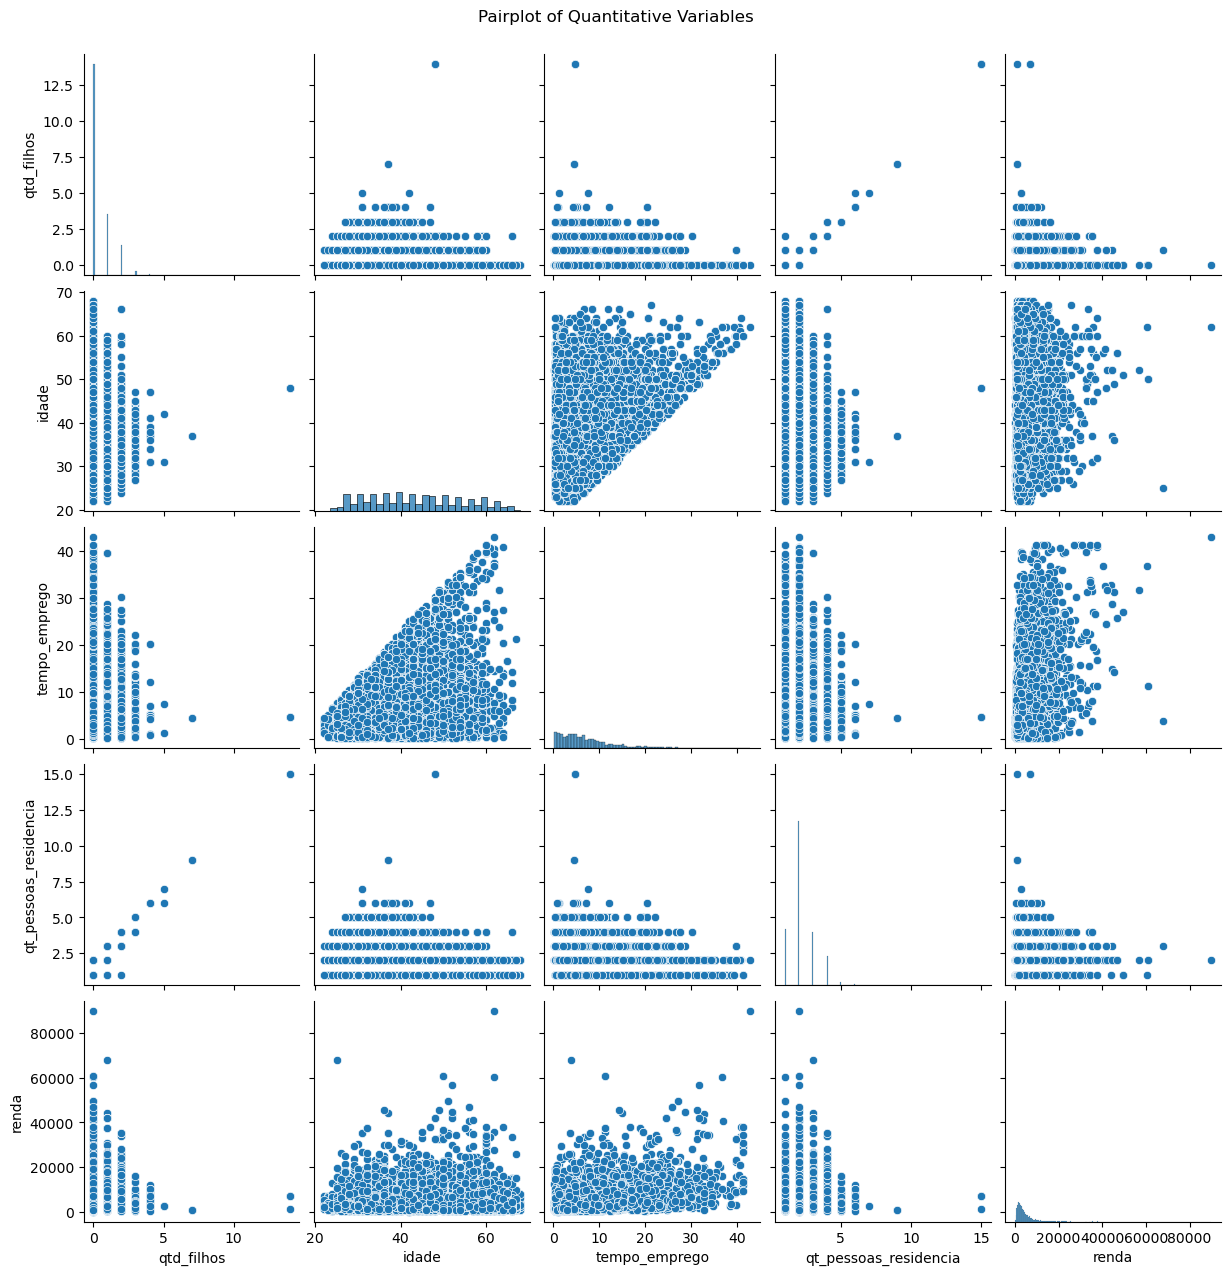

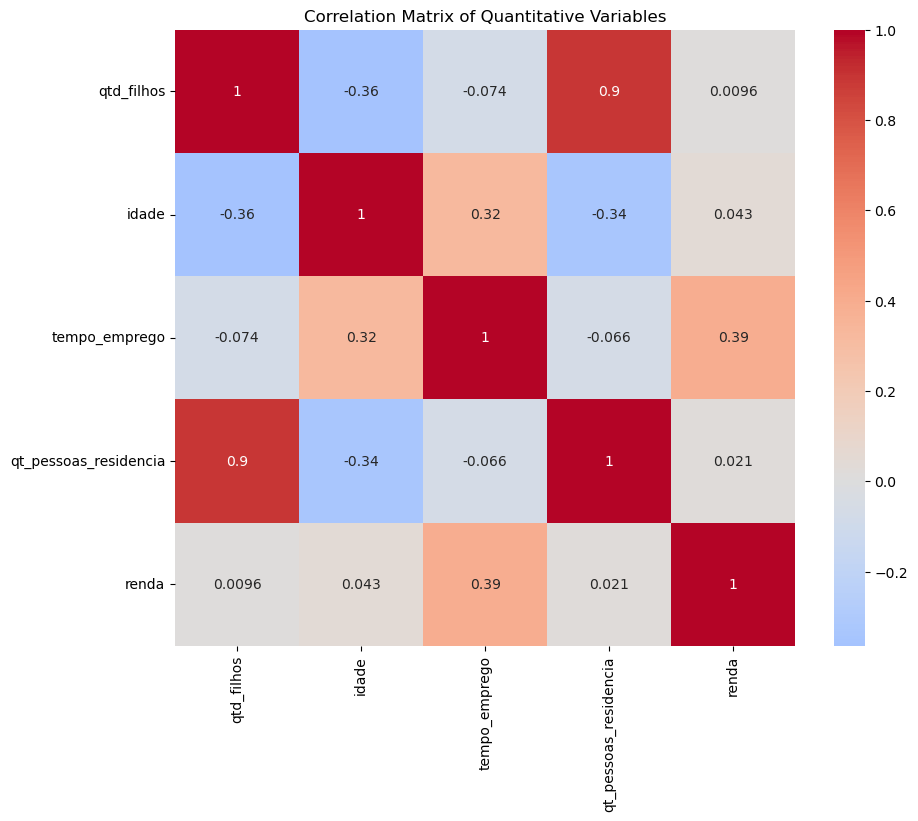

                       qtd_filhos     idade  tempo_emprego  \
qtd_filhos               1.000000 -0.364303      -0.074250   
idade                   -0.364303  1.000000       0.323934   
tempo_emprego           -0.074250  0.323934       1.000000   
qt_pessoas_residencia    0.896488 -0.338805      -0.065748   
renda                    0.009567  0.042570       0.394235   

                       qt_pessoas_residencia     renda  
qtd_filhos                          0.896488  0.009567  
idade                              -0.338805  0.042570  
tempo_emprego                      -0.065748  0.394235  
qt_pessoas_residencia               1.000000  0.020977  
renda                               0.020977  1.000000  


In [5]:
quantitative_vars = df[['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda']]


sns.pairplot(quantitative_vars)
plt.suptitle("Pairplot of Quantitative Variables", y=1.02)
plt.show()

correlation_matrix = quantitative_vars.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix of Quantitative Variables")
plt.show()

print(correlation_matrix)


2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

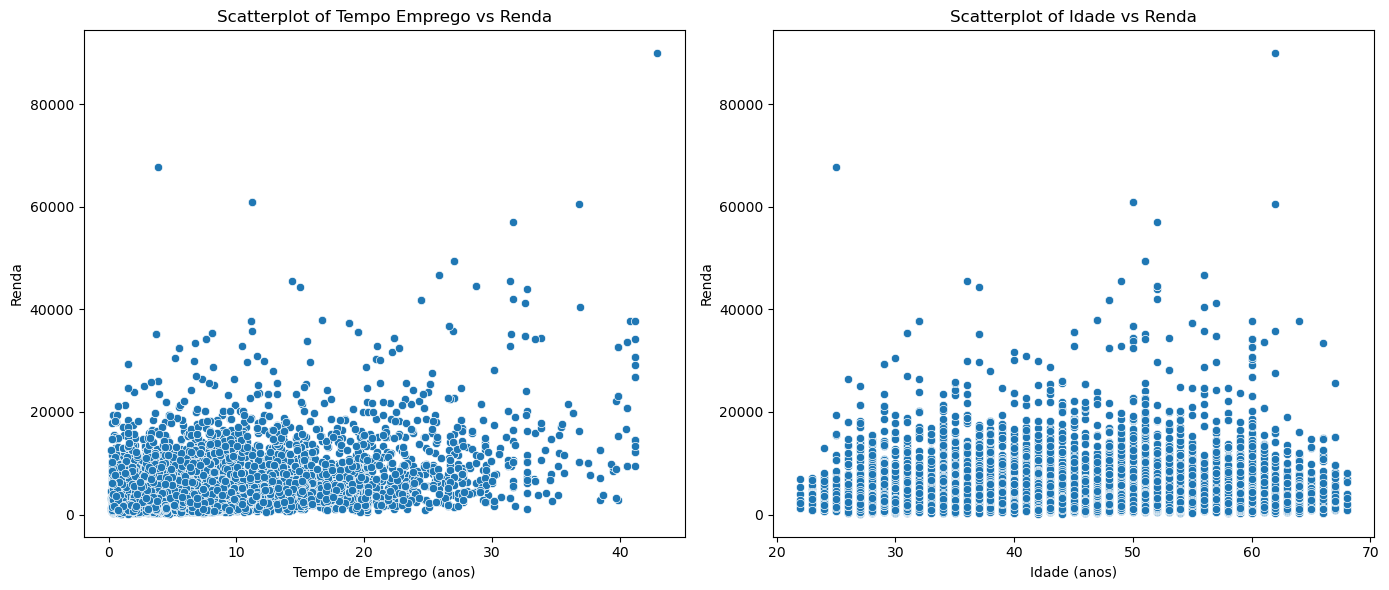

In [7]:
# Criar um gráfico de dispersão para as duas variáveis mais correlacionadas com renda
plt.figure(figsize=(14, 6))

# Gráfico de dispersão de tempo_emprego vs renda
plt.subplot(1, 2, 1)
sns.scatterplot(x=df['tempo_emprego'], y=df['renda'])
plt.title('Scatterplot of Tempo Emprego vs Renda')
plt.xlabel('Tempo de Emprego (anos)')
plt.ylabel('Renda')

# Gráfico de dispersão de idade vs renda
plt.subplot(1, 2, 2)
sns.scatterplot(x=df['idade'], y=df['renda'])
plt.title('Scatterplot of Idade vs Renda')
plt.xlabel('Idade (anos)')
plt.ylabel('Renda')

plt.tight_layout()
plt.show()

3) Na su aopinião, há outliers na variável renda?

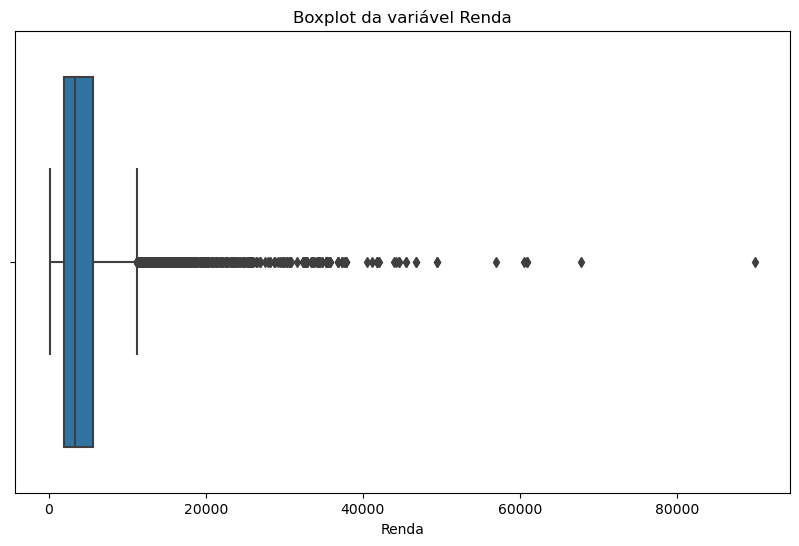

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['renda'])
plt.title('Boxplot da variável Renda')
plt.xlabel('Renda')
plt.show()

#sim temos outlier

4) Calcule o logaritmo da variável renda e repita a sequência de análise

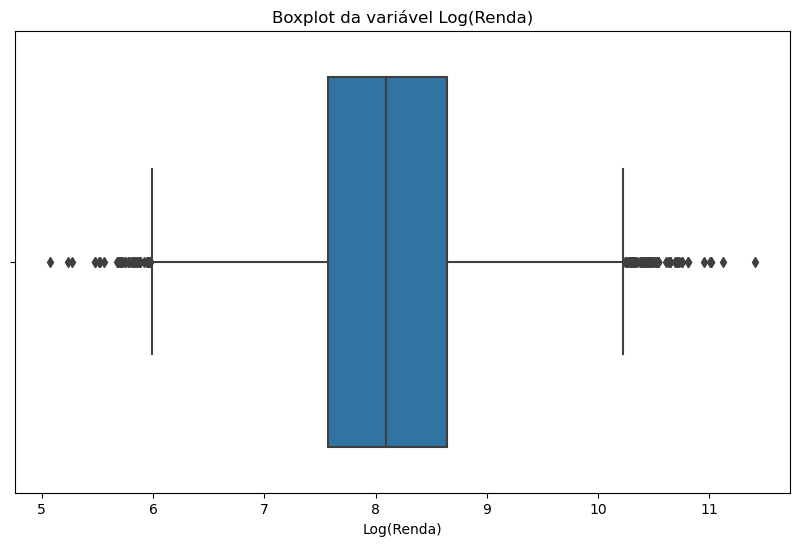

In [15]:
import numpy as np
df['log_renda'] = np.log(df['renda'])

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['log_renda'])
plt.title('Boxplot da variável Log(Renda)')
plt.xlabel('Log(Renda)')
plt.show()

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

In [ ]:
#Temos uma melhor  distribuição dos outliers 